# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Credit Card Fraud Detection

## Importing Libraries and Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Load the Credit Card dataset
data = pd.read_csv("creditcard.csv")

# Success
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Shape

In [4]:
data.shape

(284807, 31)

## Data Visualization

Text(0,0.5,'Frequency')

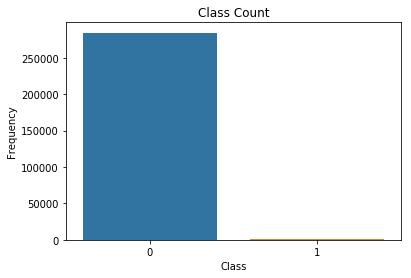

In [5]:
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

  We can see that its a class imbalance problem, because the normal transactions are more than 2500000 but the fraud               transactions are very less. 

In [6]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

Text(0,0.5,'Frequency')

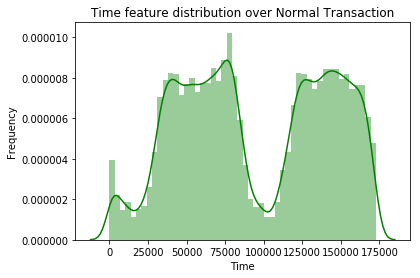

In [7]:
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We can see the distribution of Time over Normal Transactions, we can interpret that they are 2 peaks in the distribution and nothing unusual.

Text(0,0.5,'Frequency')

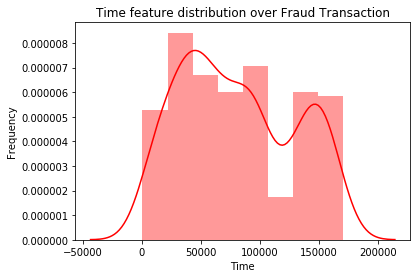

In [8]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We can see the distribution of Time over Fraud Transactions, we can interpret that it is a normal distribution and nothing unusual.

Text(0,0.5,'Frequency')

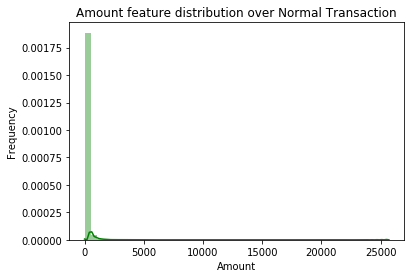

In [9]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Normal Transactions, we can interpret there is peak at the beginning but it becomes flat after the peak. 

Text(0,0.5,'Frequency')

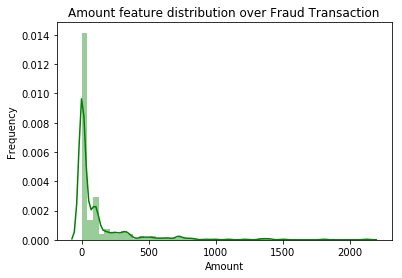

In [10]:
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Fraud Transactions, we can interpret there is huge peak at the beginning but it becomes flat after 900. 

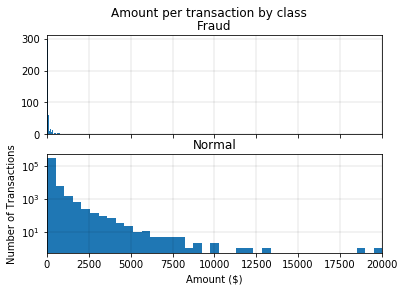

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

We can see that Normal has more number of transactions over Amount when compared to Fraud Transactions.

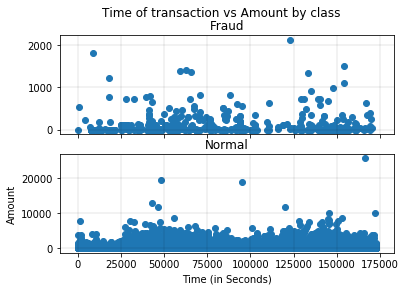

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
model_data = data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Splitting the data into features and lables 

In [12]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

## Sampling the Unbalanced Data using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

oversampler = SMOTE(random_state = 0, n_jobs = -1)
#sampler = SMOTETomek(random_state = 0)
model_train_lr , model_test_lr = oversampler.fit_sample(model_train, model_test)

## Splitting the data into training and testing 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

# Building Benchmark Model 
# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
lr_predict = lr.predict(X_test)

## Prediction Scores

Accuracy: 94.4836%
Recall: 91.5164%
ROC AUC: 94.4929%


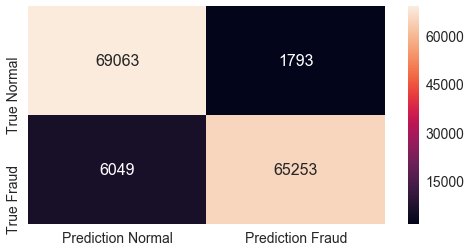

In [17]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Sampling the Unbalanced Data using SMOTETomek

In [18]:
#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

#oversampler = SMOTE(random_state = 0)
sampler = SMOTETomek(random_state = 0, n_jobs = -1)
model_train_rf , model_test_rf = sampler.fit_sample(model_train, model_test)

C:\Users\suma1\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Users\suma1\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


# Shuffle Splitting the data into training and testing

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [20]:
for train_index, test_index in sss.split(model_train_rf, model_test_rf):
    X_train, X_test = model_train_rf[train_index], model_train_rf[test_index]
    Y_train, Y_test = model_test_rf[train_index], model_test_rf[test_index]

# Building Supervised Model
# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
rf_predict = rf.predict(X_test)

# Prediction Scores

Accuracy: 99.9859%
Recall: 100.0000%
ROC AUC: 99.9859%


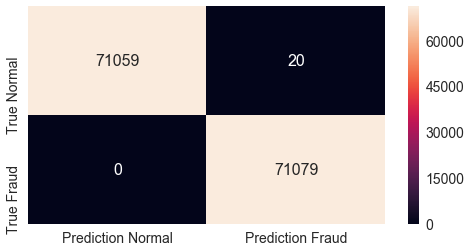

In [23]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

# Sampling the Unbalanced Data using TomekLinks

In [24]:
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

undersampler = TomekLinks(random_state = 0, n_jobs = -1)
#oversampler = SMOTE(random_state = 0)
#sampler = SMOTETomek(random_state = 0)
model_train_km , model_test_km = sampler.fit_sample(model_train, model_test)

C:\Users\suma1\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Users\suma1\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


# Optimal Clusters 

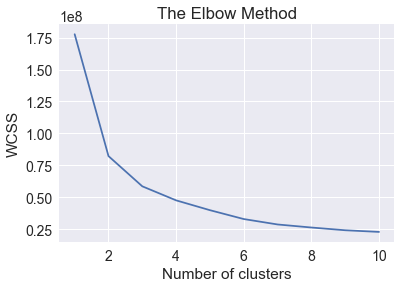

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans.fit(model_train_km)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Unsupervised Clustering
# K-Means Clustering

In [26]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_train_km)

In [35]:
centers = kmeans.cluster_centers_

In [36]:
from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(model_train_km, centers, 'euclidean'))
distance['distance_mean'] = distance.apply(np.mean, axis=1)
distance.head()

,0,1,distance_mean
0,5.666616,38.973564,22.320090
1,4.794764,38.884632,21.839698
2,7.495362,39.359109,23.427235
3,6.193085,39.171469,22.682277
4,5.546483,38.912466,22.229474


In [37]:
out_per = np.percentile(distance['distance_mean'], 95)

In [38]:
model_predict_km = np.where(distance['distance_mean'] >= out_per, 1, 0)

# Prediction Scores

Accuracy: 54.3814%
Recall: 9.3815%
ROC AUC: 54.3814%


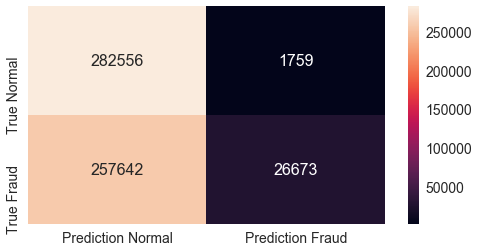

In [39]:
km_accuracy = accuracy_score(model_test_km, model_predict_km)
km_recall = recall_score(model_test_km, model_predict_km)
km_cm = confusion_matrix(model_test_km, model_predict_km)
km_auc = roc_auc_score(model_test_km, model_predict_km)

print("Accuracy: {:.4%}".format(km_accuracy))
print("Recall: {:.4%}".format(km_recall))
print("ROC AUC: {:.4%}".format(km_auc))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [40]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'K-Means': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'K-Means': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'K-Means': km_auc
}

Text(0.5,0,'Accuracy Score')

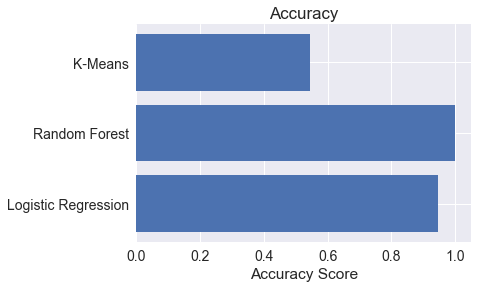

In [41]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5,0,'Recall Score')

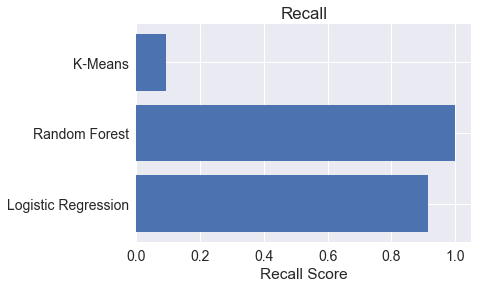

In [42]:
pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

Text(0.5,0,'AUC Score')

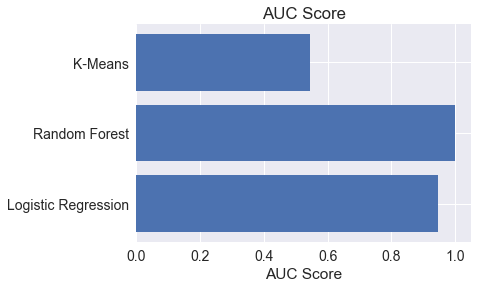

In [43]:
pyplot.title('AUC Score')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score')

## Conclusion 

1) Supervised Learning Methods clearly dominates Unsupervised Learning Methods for a class imbalance dataset. 

2) Random Forest Classifier has higher accuracy than Logistic Regresssion followed by K-Means Clustering. 

3) Similarly, Random Forest Classifier has higher recall score than Logistic Regresssion followed by K-Means Clustering. 

4) Similarly, Random Forest Classifier has higher auc score  Logistic Regresssion followed by K-Means Clustering. 

5) Therefore, I would like to conclude that Supervised Learning Methods such as Random Forest Classifier gives a better            prediction over Unsupervised Methods. 